# This notebook includes dE/dx plot for MC tracks (BNB and single particle)  

In [1]:
tracks_file_name = "full_features_MC_BNB_AnalysisTrees.csv"

In [2]:
tracks_file_name = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/" + tracks_file_name

import sys, pandas as pd, numpy as np, matplotlib.pyplot as plt, ast
import matplotlib as mpl , seaborn as sns; sns.set(style="white", color_codes=True , font_scale=1)
%matplotlib inline
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import GeneralPlot as gp , Initiation as init, plot_tools as pt
from math import sqrt
dirname = init.createnewdir()
generic = lambda x: ast.literal_eval(x)

# hits data frame
def DataFrame_hits( tracks_df ):
    resrng , dEdx , Edep = tracks_df.residual_range_Y , tracks_df.dEdx_Y , tracks_df.Edep_Y
    if len(resrng) == 0:
        print 'there are no tracks...'
        return False
    resrng = np.concatenate(resrng.ravel())
    dEdx = np.concatenate(dEdx.ravel())
    Edep = np.concatenate(Edep.ravel())
    hits_df = pd.DataFrame(data={'residual_range':resrng,'dEdx':dEdx,'Edep':Edep})
    hits_df = hits_df[ (hits_df.dEdx>0.1) & (hits_df.dEdx<100) & (hits_df.residual_range>0.1) & (hits_df.residual_range<200) ] 
    return hits_df

# hits data frame for high-purity (=1) and low-purity (<0.6) tracks
def DataFrame_hits_lowhigh_purity( tracks_df ):
    tracks_df_low_purity = tracks_df[tracks_df.purtruth_Y<0.6]
    if len(tracks_df_low_purity) == 0:
        print 'there are no low-purity tracks...'
        return False, False
    hits_df_low_purity = DataFrame_hits( tracks_df_low_purity )
    tracks_df_high_purity = tracks_df[tracks_df.purtruth_Y==1]
    if len(tracks_df_high_purity) == 0:
        print 'there are no high-purity tracks...'
        return False, False

    hits_df_high_purity = DataFrame_hits( tracks_df_high_purity )
    return hits_df_low_purity , hits_df_high_purity


# scatter plot
def dEdx_scatter( df_hits , label='' ,color='black' , s=0.1 , alpha=1 , x_text=30, y_text=27):
    x , y = df_hits.residual_range , df_hits.dEdx
    plt.scatter( x ,y ,s=s,color=color,alpha=alpha)
    plt.axis([0,100,0,30])
    plt.xlabel('residual range [cm]')
    plt.ylabel('$dE/dx$ [MeV/cm]')
    plt.text(x_text,y_text,label,color=color)

# scatter plot
def dEdx_scatter_mulitple( df_hits_list , labels ,colors , s=0.1 , alpha=0.8):
    c = 0
    for df_hits,label,color in zip( df_hits_list , labels , colors ):
        dEdx_scatter( df_hits , label=label ,color=color , s=s , alpha=alpha , x_text=30+2*c, y_text=27-c)
        c += 1.5

    
def dEdx_jointplot( df_hits , cmap='hot_r' , label='protons', xlim=(0,100) , ylim=(0,30)):
    with sns.axes_style("white"):
        g = sns.jointplot(df_hits.residual_range , df_hits.dEdx , 
                          cmap=cmap, kind="hex", stat_func=None,
                          xlim=xlim, ylim=ylim,
                          marginal_kws={'color': 'blue'})
    g.set_axis_labels('residual range [cm]' , '$dE/dx$ [MeV/cm]')
    plt.colorbar()
    g.fig.suptitle(label)
LAr_density = 1.396

In [3]:
tracks = pd.read_csv(tracks_file_name,converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic})

In [4]:
hits = DataFrame_hits( tracks )

In [5]:
protons = tracks[tracks.MCpdgCode==2212]
p_hits = DataFrame_hits( protons )
p_hits_low_purity , p_hits_high_purity = DataFrame_hits_lowhigh_purity (protons)

In [41]:
muons = tracks[tracks.MCpdgCode==13]
mu_hits = DataFrame_hits( muons )
mu_hits_low_purity , mu_hits_high_purity = DataFrame_hits_lowhigh_purity (muons)

In [42]:
pions = tracks[(tracks.MCpdgCode==211) | (tracks.MCpdgCode==-211)]
pi_hits = DataFrame_hits( pions )
pi_hits_low_purity , pi_hits_high_purity = DataFrame_hits_lowhigh_purity (pions)

In [8]:
p_hits

,Edep,dEdx,residual_range


ZeroDivisionError: float division by zero

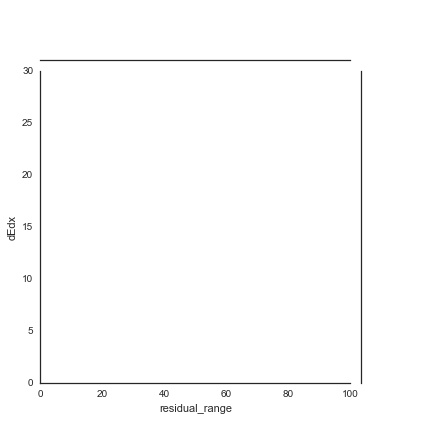

In [7]:
dEdx_jointplot(p_hits , cmap='Purples' , label='protons')
# dEdx_jointplot(mu_hits , cmap='Greys' , label='muons')
# dEdx_jointplot(pi_hits , cmap='Blues' , label='pions')

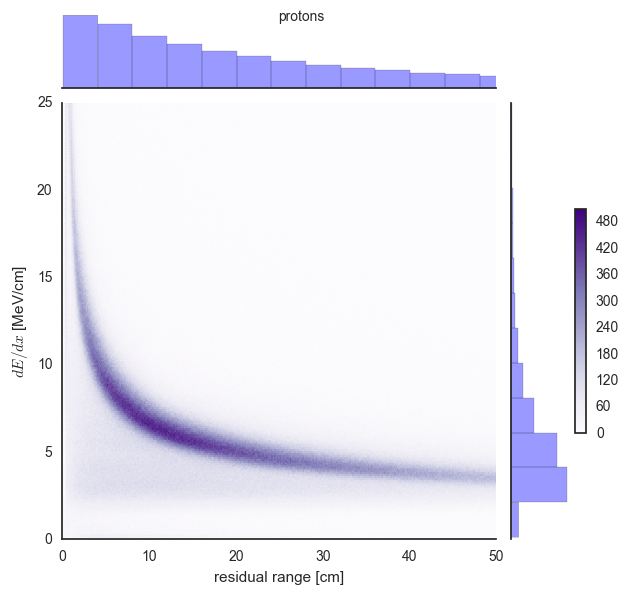

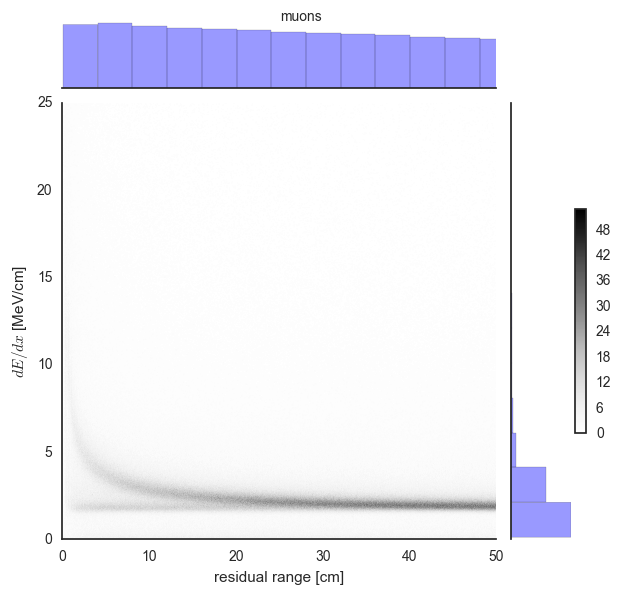

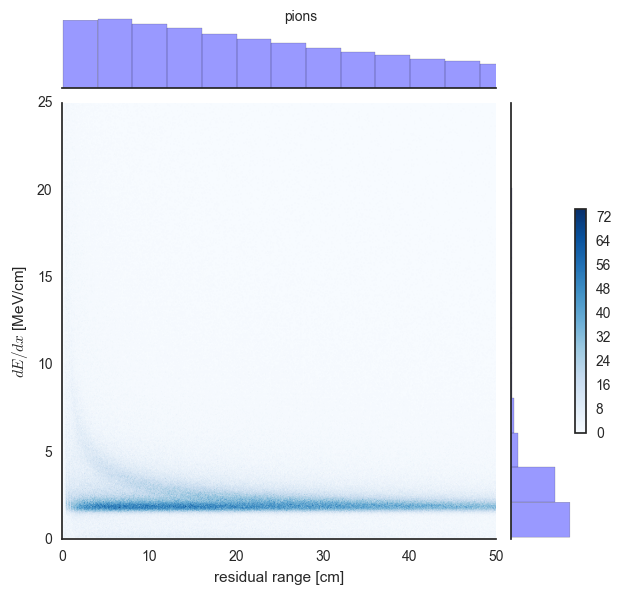

In [24]:
dEdx_jointplot(p_hits , cmap='Purples' , label='protons' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(mu_hits , cmap='Greys' , label='muons', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(pi_hits , cmap='Blues' , label='pions', xlim=(0,50), ylim=(0,25))

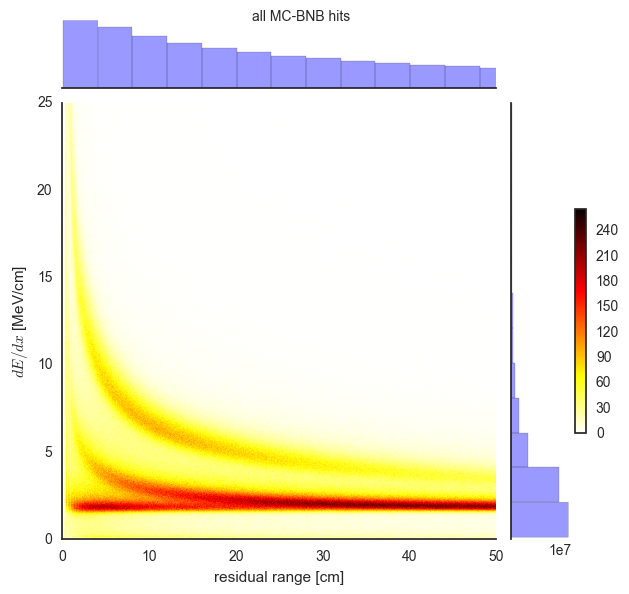

In [27]:
dEdx_jointplot(hits , cmap='hot_r' , label='all MC-BNB hits' , xlim=(0,50), ylim=(0,25))

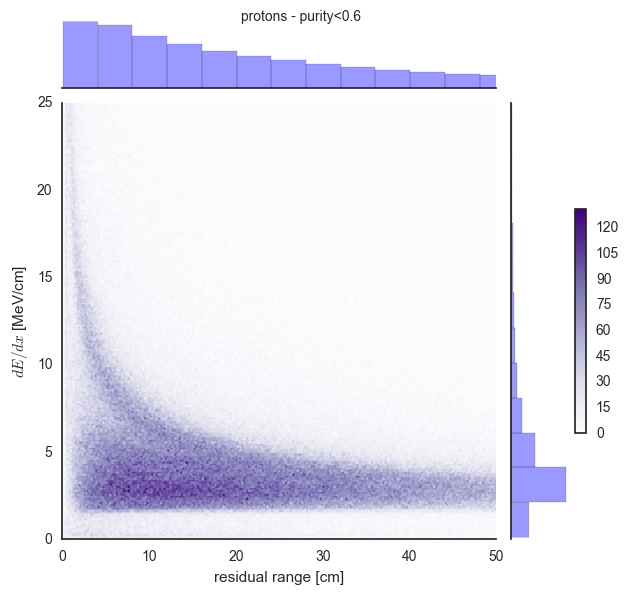

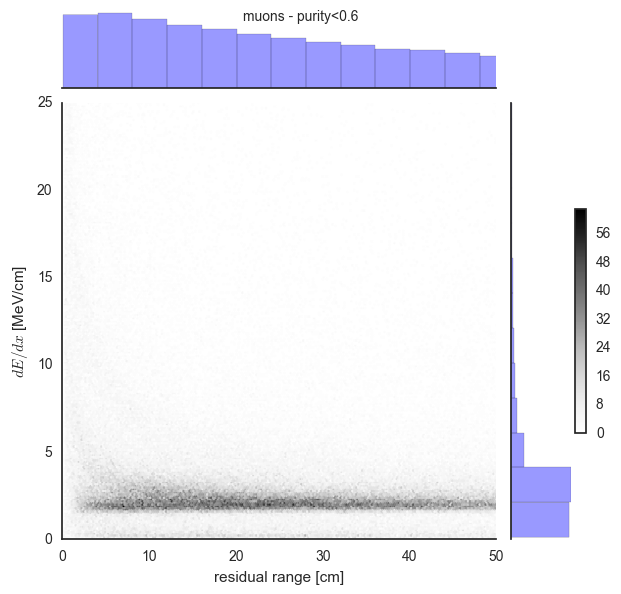

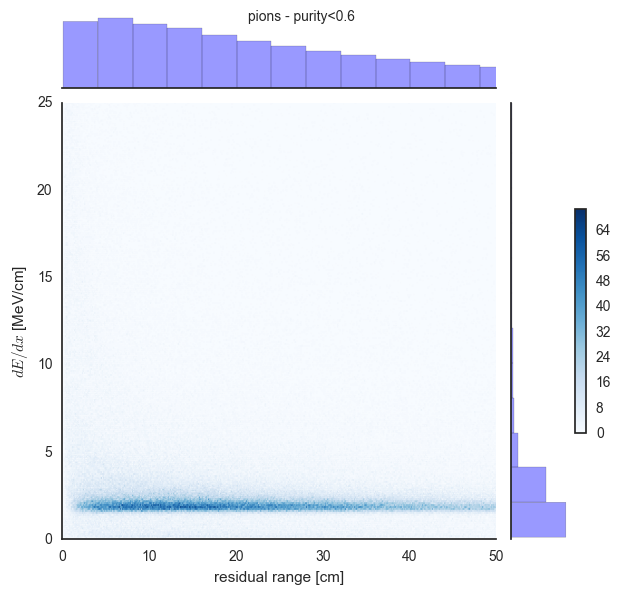

In [26]:
dEdx_jointplot(p_hits_low_purity , cmap='Purples' , label='protons - purity<0.6' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(mu_hits_low_purity , cmap='Greys' , label='muons - purity<0.6', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(pi_hits_low_purity , cmap='Blues' , label='pions - purity<0.6', xlim=(0,50), ylim=(0,25))

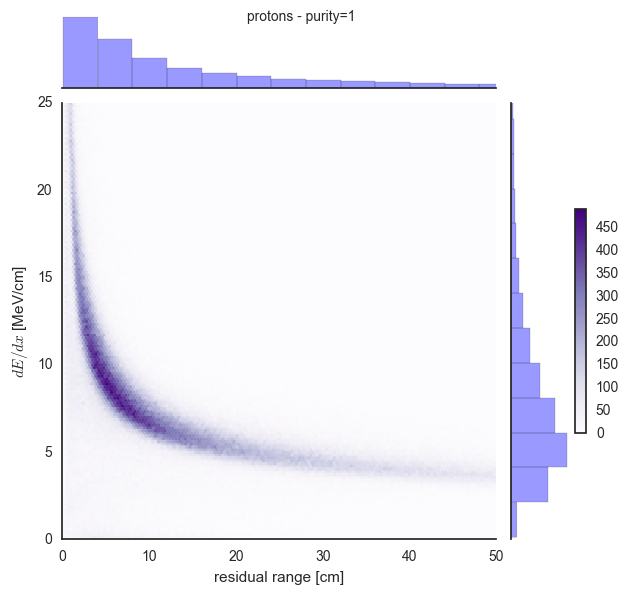

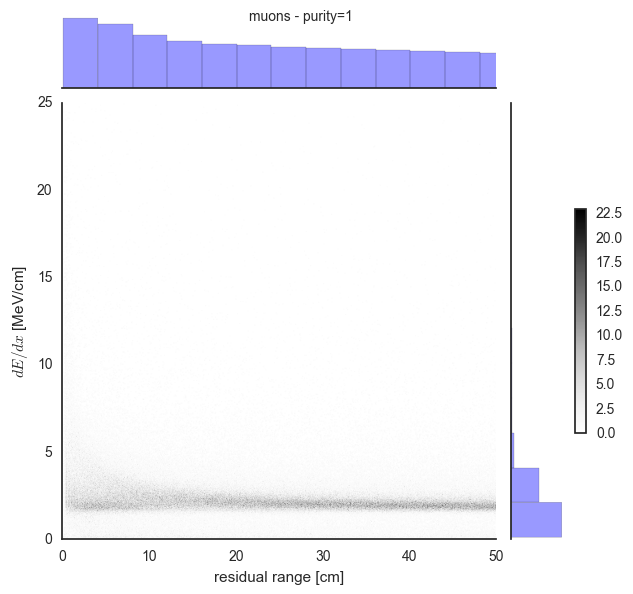

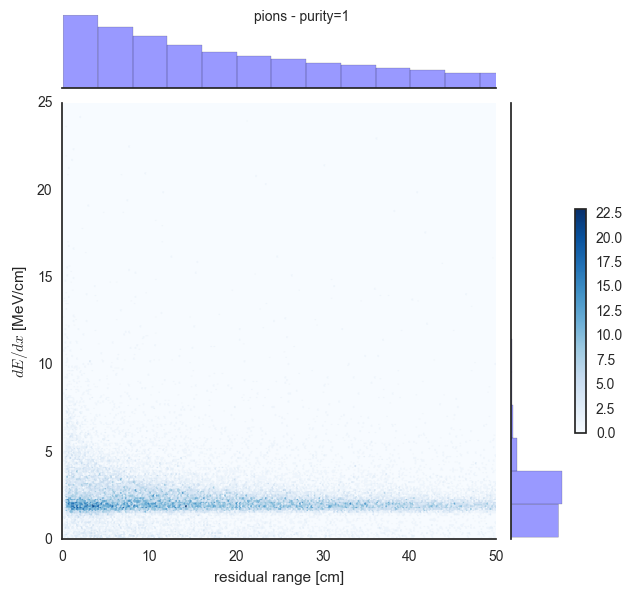

In [28]:
dEdx_jointplot(p_hits_high_purity , cmap='Purples' , label='protons - purity=1' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(mu_hits_high_purity , cmap='Greys' , label='muons - purity=1', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(pi_hits_high_purity , cmap='Blues' , label='pions - purity=1', xlim=(0,50), ylim=(0,25))

In [31]:
single_p_tracks = pd.read_csv("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_p_0.02-1.5GeV_isotropic_AnalysisTrees.csv",converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic})
single_p_hits = DataFrame_hits( single_p_tracks )
single_p_hits_low_purity , single_p_hits_high_purity = DataFrame_hits_lowhigh_purity ( single_p_tracks )

In [32]:
single_pi_tracks = pd.read_csv("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_piminus_0-2.0GeV_isotropic_AnalysisTrees.csv",converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic})
single_pi_hits = DataFrame_hits( single_pi_tracks )
single_pi_hits_low_purity , single_pi_hits_high_purity = DataFrame_hits_lowhigh_purity ( single_pi_tracks )

In [33]:
single_mu_tracks = pd.read_csv("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_muminus_0-2.0GeV_isotropic_AnalysisTrees.csv",converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic})
single_mu_hits = DataFrame_hits( single_mu_tracks )
single_mu_hits_low_purity , single_mu_hits_high_purity = DataFrame_hits_lowhigh_purity ( single_mu_tracks )

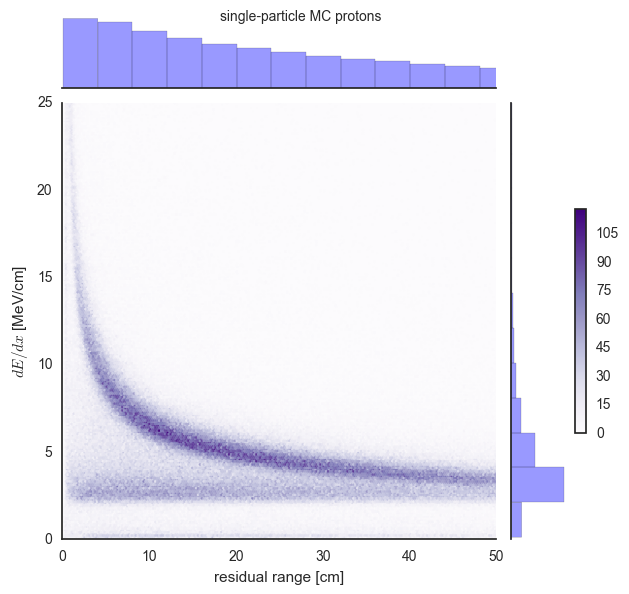

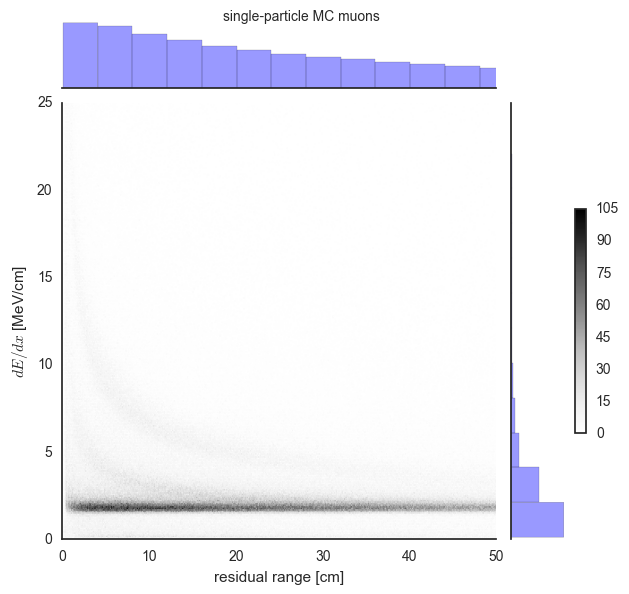

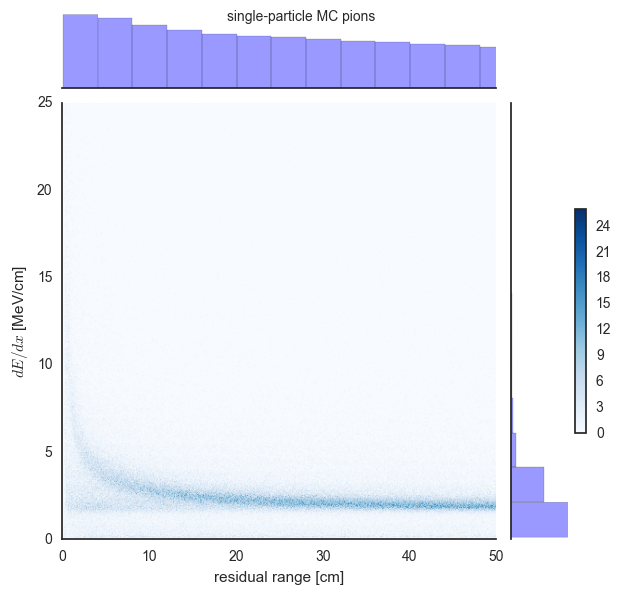

In [34]:
dEdx_jointplot(single_p_hits , cmap='Purples' , label='single-particle MC protons' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(single_pi_hits , cmap='Greys' , label='single-particle MC muons', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(single_mu_hits , cmap='Blues' , label='single-particle MC pions', xlim=(0,50), ylim=(0,25))

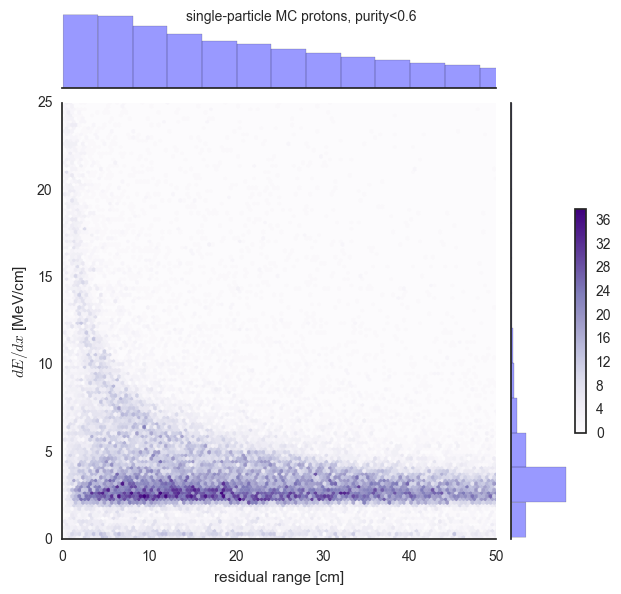

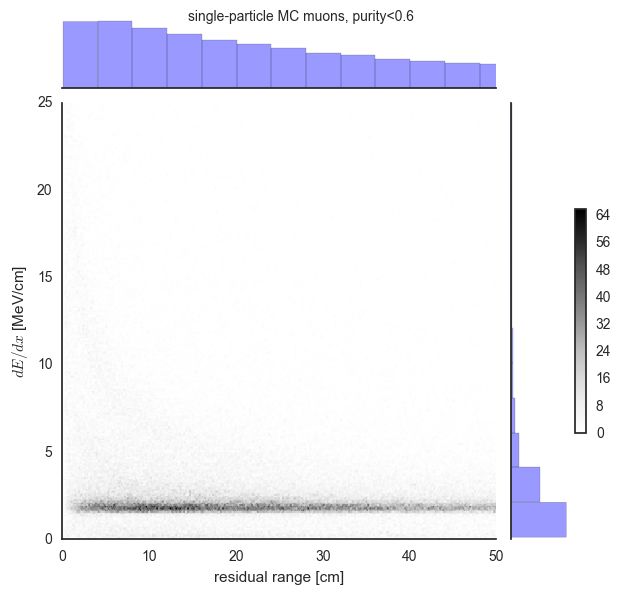

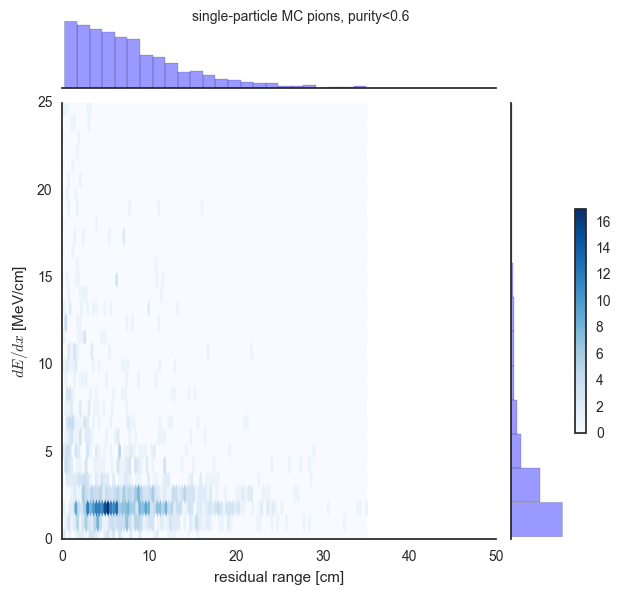

In [35]:
dEdx_jointplot(single_p_hits_low_purity , cmap='Purples' , label='single-particle MC protons, purity<0.6' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(single_pi_hits_low_purity , cmap='Greys' , label='single-particle MC muons, purity<0.6', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(single_mu_hits_low_purity , cmap='Blues' , label='single-particle MC pions, purity<0.6', xlim=(0,50), ylim=(0,25))

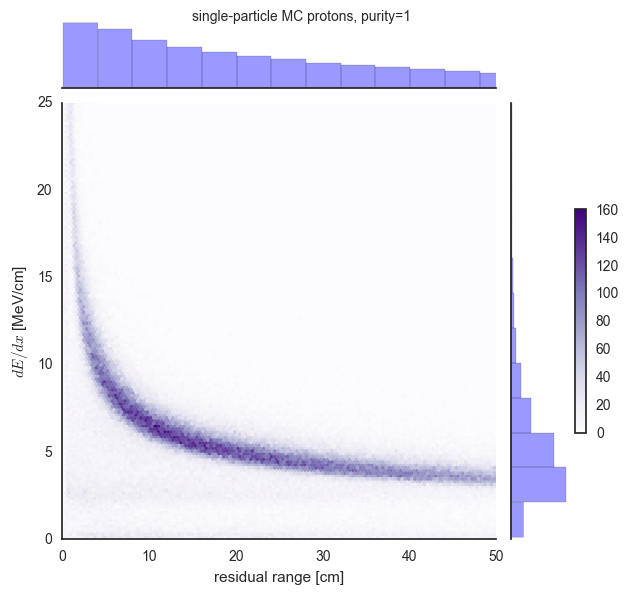

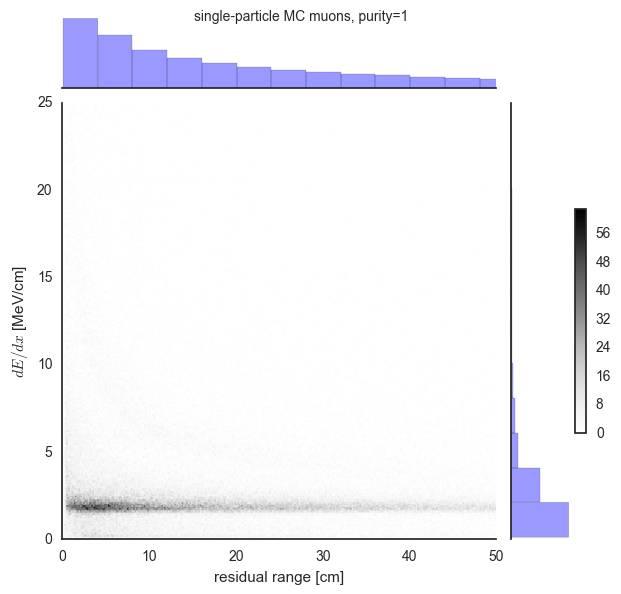

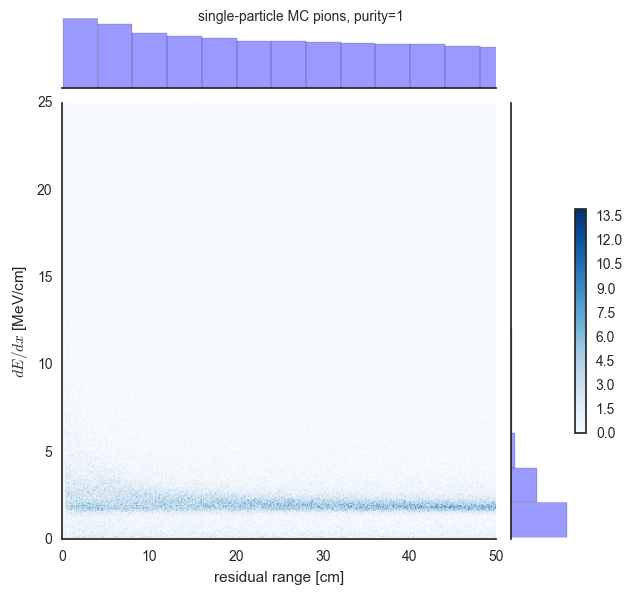

In [36]:
dEdx_jointplot(single_p_hits_high_purity , cmap='Purples' , label='single-particle MC protons, purity=1' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(single_pi_hits_high_purity , cmap='Greys' , label='single-particle MC muons, purity=1', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(single_mu_hits_high_purity , cmap='Blues' , label='single-particle MC pions, purity=1', xlim=(0,50), ylim=(0,25))

# Bethe-Bloch most probable dE/dx
take the numbers for stopping protons in LAr from Kaleko

In [116]:
BetheBloch_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/protons.csv',
                                 names=['Range [g/cm2]','Tp [MeV]'],delimiter='	',
                                 dtype={'Range [g/cm2]':np.float64,'Tp [MeV]':np.float64})
BetheBloch_protons['Range [cm]'] = BetheBloch_protons['Range [g/cm2]']/LAr_density
BetheBloch_protons['E [MeV]'] = BetheBloch_protons['Tp [MeV]'] + 938.272
BetheBloch_protons['p [MeV/c]'] = np.sqrt(BetheBloch_protons['E [MeV]']*BetheBloch_protons['E [MeV]'] - 938.272*938.272)
BetheBloch_muons = pd.DataFrame({'Range [g/cm2]':[9.833E-1, 1.786E0, 3.321E0, 6.598E0, 1.058E1, 3.084E1, 4.250E1,
                                                  6.732E1, 1.063E2, 1.725E2, 2.385E2, 4.934E2,
                                                  6.163E2, 8.552E2, 1.202E3, 1.758E3, 2.297E3,
                                                  4.359E3, 5.354E3, 7.298E3, 1.013E4, 1.469E4,
                                                  1.910E4, 3.558E4, 4.326E4, 5.768E4, 7.734E4, 1.060E5, 1.307E5],
                                  'Tp [MeV]':[10, 14, 20, 30, 40, 80, 100, 140, 200, 300, 400, 800, 1000,
                                              1400, 2000, 3000, 4000, 8000, 10000, 14000, 20000, 30000,
                                              40000, 80000, 100000, 140000, 200000, 300000, 400000]})

BetheBloch_muons['Range [cm]'] = BetheBloch_muons['Range [g/cm2]']/LAr_density
BetheBloch_muons['E [MeV]'] = BetheBloch_muons['Tp [MeV]'] + 105.6
BetheBloch_muons['p [MeV/c]'] = np.sqrt(BetheBloch_muons['E [MeV]']*BetheBloch_muons['E [MeV]'] - 105.6*105.6)

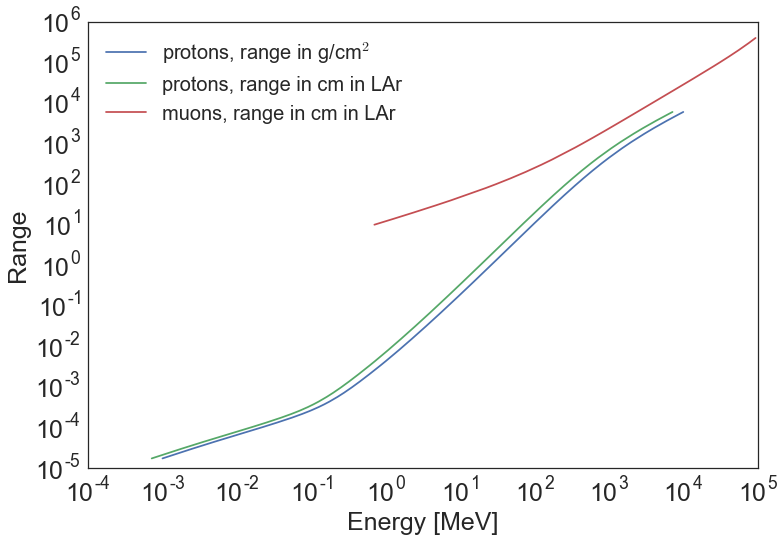

In [115]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(BetheBloch_protons['Range [g/cm2]'],BetheBloch_protons['Tp [MeV]'],label='protons, range in g/cm$^2$')
plt.plot(BetheBloch_protons['Range [cm]'],BetheBloch_protons['Tp [MeV]'],label='protons, range in cm in LAr')
plt.plot(BetheBloch_muons['Range [cm]'],BetheBloch_muons['Tp [MeV]'],label='muons, range in cm in LAr')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(fontsize=20,loc='upper left')
pt.set_axes(ax,'Energy [MeV]','Range')
# ax.set_xlim(1,300)
# ax.set_ylim(1,200)

# dE/dx from Tingjun truth profiles

In [120]:
dEdx_truth_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_protons.csv')
dEdx_truth_kaons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_kaons.csv')
dEdx_truth_pions = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_pions.csv')
dEdx_truth_muons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_muons.csv')

(0, 40)

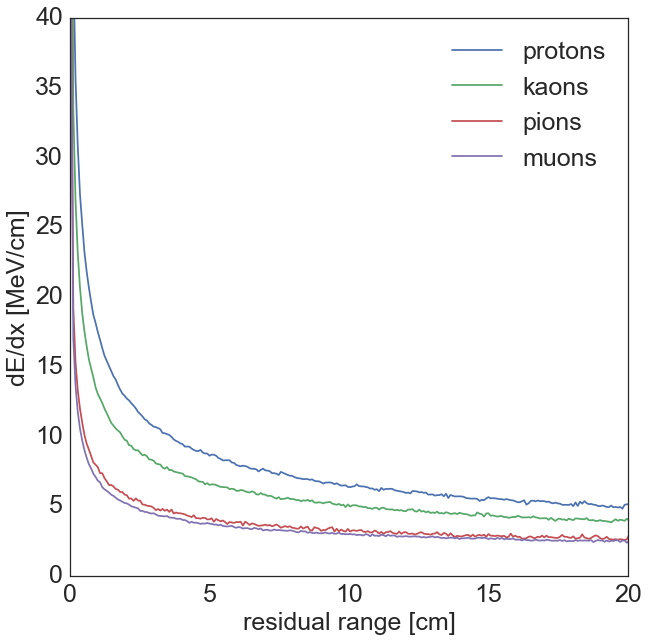

In [126]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(dEdx_truth_protons['residual range [cm]'],dEdx_truth_protons['dE/dx [MeV/cm]'],label='protons')
plt.plot(dEdx_truth_kaons['residual range [cm]'],dEdx_truth_kaons['dE/dx [MeV/cm]'],label='kaons')
plt.plot(dEdx_truth_pions['residual range [cm]'],dEdx_truth_pions['dE/dx [MeV/cm]'],label='pions')
plt.plot(dEdx_truth_muons['residual range [cm]'],dEdx_truth_muons['dE/dx [MeV/cm]'],label='muons')
pt.set_axes(ax,'residual range [cm]','dE/dx [MeV/cm]')
plt.legend(fontsize=25)
ax.set_xlim(0,20)
ax.set_ylim(0,40)

(0, 40)

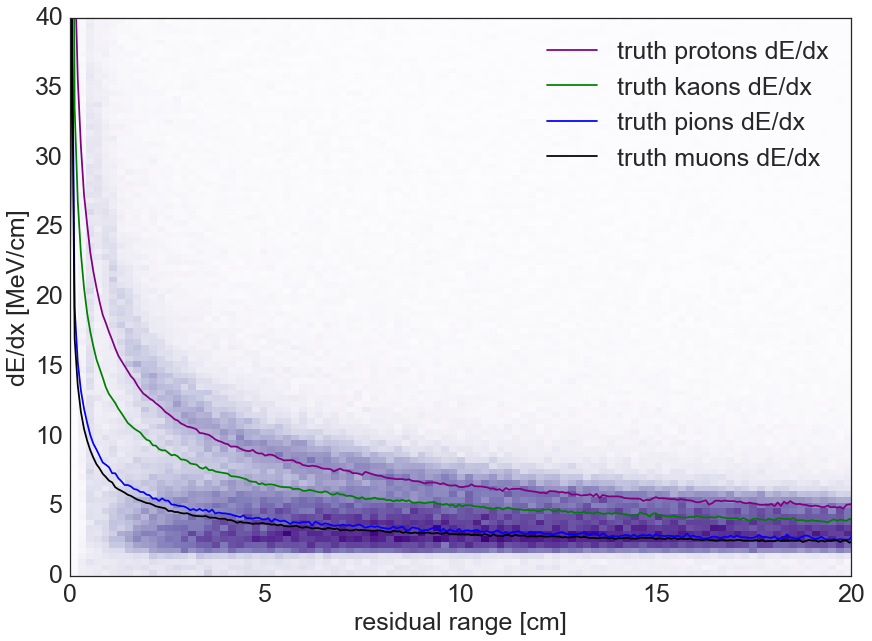

In [151]:
fig,ax = plt.subplots(figsize=(14,10))
# plt.hist2d(p_hits.residual_range , p_hits.dEdx  , bins=[np.linspace(0,20,100),np.linspace(0,40,100)], cmap='Purples' , label='reconstructed MC protons');
plt.hist2d(p_hits_low_purity.residual_range , p_hits_low_purity.dEdx  , bins=[np.linspace(0,20,100),np.linspace(0,40,100)], cmap='Purples' , label='reconstructed MC protons (purity<0.6)');
plt.plot(dEdx_truth_protons['residual range [cm]'],dEdx_truth_protons['dE/dx [MeV/cm]'],color='purple',label='truth protons dE/dx')
plt.plot(dEdx_truth_kaons['residual range [cm]'],dEdx_truth_kaons['dE/dx [MeV/cm]'],color='green',label='truth kaons dE/dx')
plt.plot(dEdx_truth_pions['residual range [cm]'],dEdx_truth_pions['dE/dx [MeV/cm]'],color='blue',label='truth pions dE/dx')
plt.plot(dEdx_truth_muons['residual range [cm]'],dEdx_truth_muons['dE/dx [MeV/cm]'],color='black',label='truth muons dE/dx')
pt.set_axes(ax,'residual range [cm]','dE/dx [MeV/cm]')
plt.legend(fontsize=25)
ax.set_xlim(0,20)
ax.set_ylim(0,40)